In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
# Load each country's cleaned CSV 
benin = pd.read_csv("C:/Users/Gerji/Desktop/projects/solar-challenge-week1/data/benin-malanville.csv")
sierra = pd.read_csv("C:/Users/Gerji/Desktop/projects/solar-challenge-week1/data/sierraleone-bumbuna.csv")
togo = pd.read_csv("C:/Users/Gerji/Desktop/projects/solar-challenge-week1/data/togo-dapaong_qc.csv")


In [4]:
# Add a column to identify country
benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"


In [5]:
# Combine into one DataFrame
df = pd.concat([benin, sierra, togo], ignore_index=True)

# Show quick preview
print(df.head())

             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   ...  Cleaning  Precipitation  TModA  TModB  Comments    Month  Month_num  \
0  ...         0            0.0   24.7   24.4       NaN  October       10.0   
1  ...         0            0.0   24.7   24.4       NaN  October       10.0   
2  ...         0            0.0   24.7   24.4       NaN  October       10.0   
3  ...         0            0.0   24.7   24.4       NaN  October       10.0   
4  ...         0            0.0   24.7   24.4       NaN  October       10.0   

   WD_group     RH_bin Country  
0     225.0  (75, 100] 

In [6]:
metrics = ["GHI", "DNI", "DHI"]

summary = df.groupby("Country")[metrics].agg(["mean", "median", "std"]).round(2)
print(summary)


                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         156.52  
Sierra Leone  158.95  
Togo          156.52  


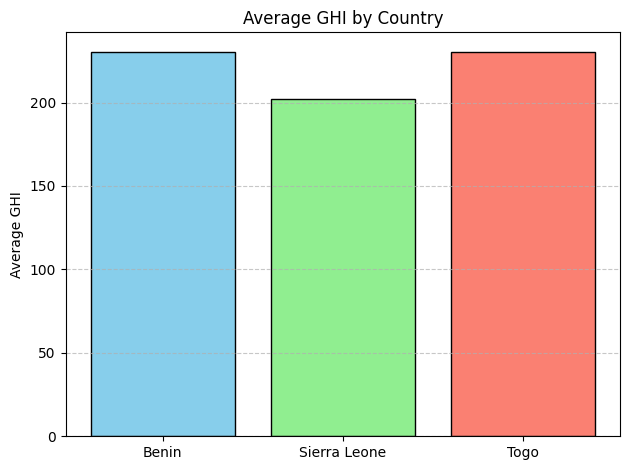

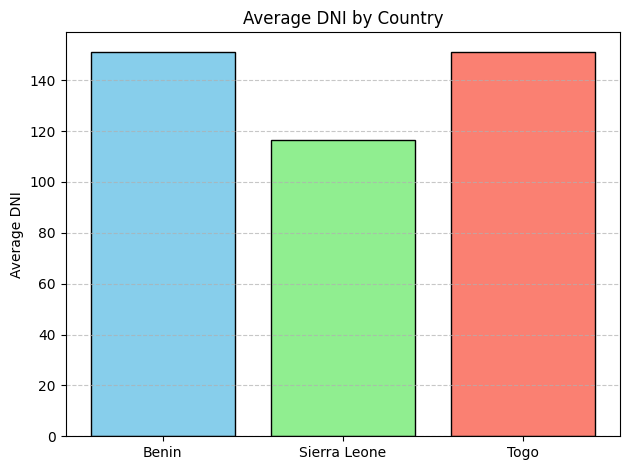

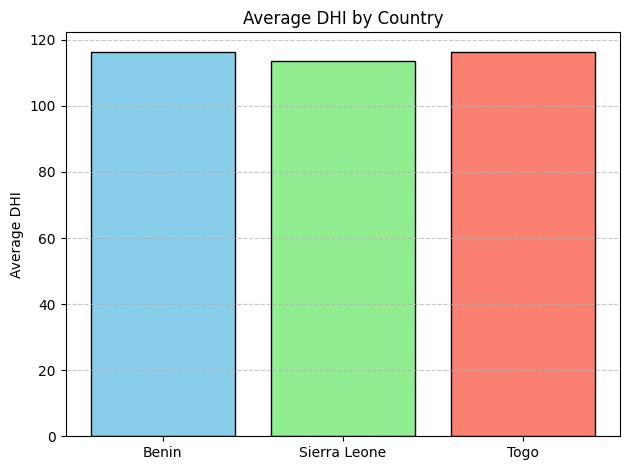

In [7]:
for metric in metrics:
    country_means = df.groupby("Country")[metric].mean()

    plt.bar(country_means.index, country_means.values,
            color=["skyblue", "lightgreen", "salmon"], edgecolor="black")
    plt.title(f"Average {metric} by Country")
    plt.ylabel(f"Average {metric}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


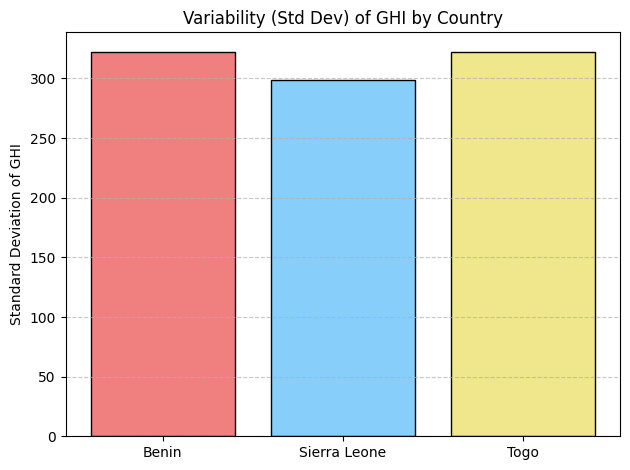

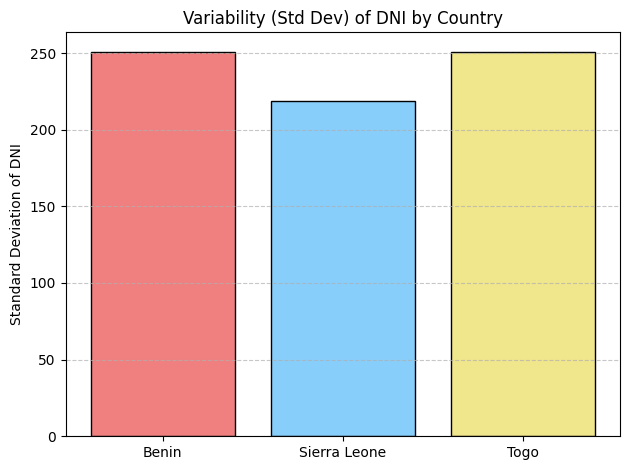

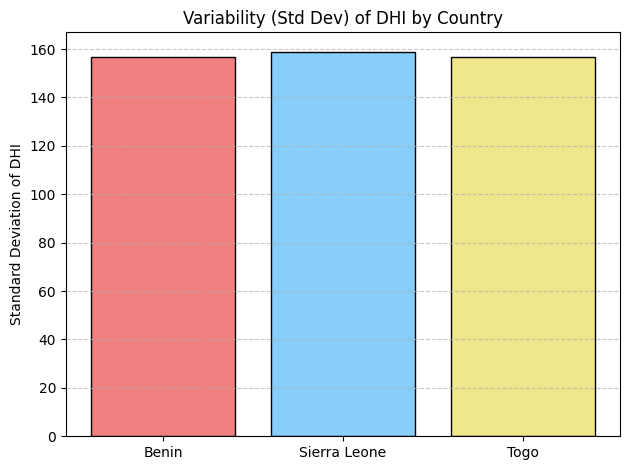

In [8]:
for metric in metrics:
    country_std = df.groupby("Country")[metric].std()

    plt.bar(country_std.index, country_std.values,
            color=["lightcoral", "lightskyblue", "khaki"], edgecolor="black")
    plt.title(f"Variability (Std Dev) of {metric} by Country")
    plt.ylabel(f"Standard Deviation of {metric}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [9]:
from scipy.stats import f_oneway

for metric in metrics:
    # Extract values for each country
    benin_vals = benin[metric].dropna()
    sierra_vals = sierra[metric].dropna()
    togo_vals = togo[metric].dropna()

    # One-way ANOVA
    F, p = f_oneway(benin_vals, sierra_vals, togo_vals)
    print(f"{metric}:  p = {p:.4f}")


GHI:  p = 0.0000
DNI:  p = 0.0000
DHI:  p = 0.0000


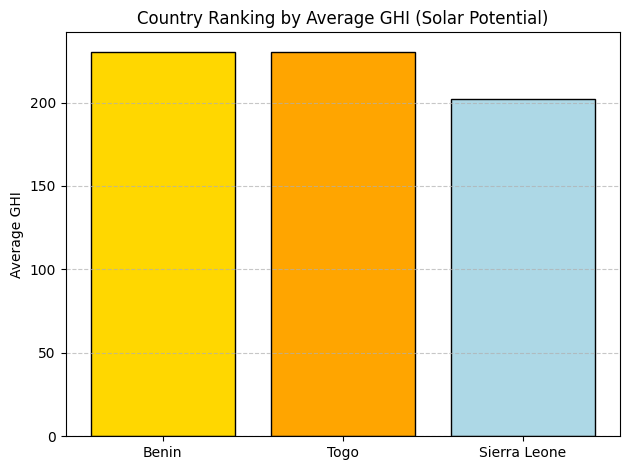

In [10]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.bar(avg_ghi.index, avg_ghi.values,
        color=["gold", "orange", "lightblue"], edgecolor="black")
plt.title("Country Ranking by Average GHI (Solar Potential)")
plt.ylabel("Average GHI")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
print("""
### 🌍 Key Observations
• Benin shows the highest average GHI, suggesting stronger solar potential.
• Sierra Leone has the lowest GHI but the most stable (lowest variability).
• Togo’s DNI values fluctuate more, possibly due to weather or measurement gaps.
""")



### 🌍 Key Observations
• Benin shows the highest average GHI, suggesting stronger solar potential.
• Sierra Leone has the lowest GHI but the most stable (lowest variability).
• Togo’s DNI values fluctuate more, possibly due to weather or measurement gaps.

